## The Prediction of Client Subscription to Bank Deposits

Danni Li ; Vanessa Pang; Zunquan Wang; Diane Xu; Zibo Shang

### 1. Introduction

When a client deposits money into a bank, the bank can use that same money to lend to other customers (Westpac., n.d). However, since clients can withdraw their money at any time, it makes it difficult for banks to budget how much they are allowed to lend out (Westpac., n.d). Therefore, offering term deposits is one of the many ways used to address this issue.

A term deposit is an investment where the client is guaranteed a specific return rate at the end of a fixed-term after depositing funds into a bank (Chen, 2021). By investing in these accounts, the client agrees to not withdraw their funds for a specific time frame in return for a higher interest rate (Westpac., n.d). One of the many benefits includes that if interest rates shift lower over time, the client will still earn the fixed interest rate on the maturity date (Chen, 2021). Banks have often been interested in knowing what type of clients will subscribe to term deposits. Therefore, this data analysis project will address the question, “Given a new client, will they subscribe to a term deposit?”

The dataset used to explore the above question is taken from the UCI Machine Learning Repository and is titled bank-additional-full.csv. This file includes 41188 observations, ranging from May 2008 to November 2010, and 20 input variables. The target variable is y, a boolean: Yes if the client subscribes to a term deposit, and No otherwise. Of the 41188 observations, 5289 clients are subscribed to a term deposit, and 39922 are not subscribed.


<img align="centre" src="https://www.vpcu.com/Images/Term_deposits.aspx/?width=400&height=200" width="750" />

Figure I: Introduction (Term Deposit Rates, 2021)

### 2. Methodology

Primarily, we split the data into training and testing data set and then scale the data for an unbaised result.<br>
Then, we perform a KNN-classification on various values of K using the training set. The technic K-fold cross-validation is applied to the training set to limit the bias and improve training accuracy.<br>
After the model generates, we choose the optimal value of K by plotting the “accuracy vs K” elbow graph.<br>
Eventually, by using the optimal K value, we create the final model and calculate its testing accuracy by using the model to predict values in the test dataset and compare it to the actual categorical variables given before in the test data frame.

#### 2.1 Importing the dataset from online source and loading the data into the Jupyter Notebook

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

#downloading zip file that contains dataset to local env
download.file("http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip","bank.zip")
unzip("bank.zip", "bank-full.csv") #unzip
bank <- read.csv("bank-full.csv", sep=";", header = TRUE) 
bank

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Table 1: Orginal Dataset

#### 2.2 Tidy the dataframe for the planned analysis

The response variables we are interested are in two categories: <br>
Categorical variables including:

- job : type of job (7 types)
- loan: has personal loan (2 types)
- marital: has married? (3 types)
- education: level of education (4 types)
- housing: own a house? (2 types)<br>

Numerical variables including:
- age
- balance

In [24]:
# The expected outcome `y` is mutated into a factor for future traning
bank<- bank%>%
        mutate(y = as_factor(y)) %>%   #mutating all chr columns into factor for training
        mutate(job = as_factor(job)) %>%
        mutate(marital = as_factor(marital)) %>%
        mutate(education = as_factor(education)) %>%
        mutate(housing = as_factor(housing)) %>%
        select(y,age,balance,job,loan,marital,education,housing) #eliminating all unuseful information -- we only need information on the customer themsleves, not the previous events
head(bank)

,y,age,balance,job,loan,marital,education,housing
,<fct>,<int>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>
1,no,58,2143,management,no,married,tertiary,yes
2,no,44,29,technician,no,single,secondary,yes
3,no,33,2,entrepreneur,yes,married,secondary,yes
4,no,47,1506,blue-collar,no,married,unknown,yes
5,no,33,1,unknown,no,single,unknown,no
6,no,35,231,management,no,married,tertiary,yes


Table 2:Cleaned Dataset

#### 2.3 Splitting data frame into training and testing sets

Here we use the classic 7.5/2.5 ratio to provide a good balance of training and testing set size

In [3]:
# Splitting the dataset into traning and testing set. 
set.seed(2021)  #setting seed so that our results does not change
bank_split <- initial_split(bank, prop = 0.75, strata = y)  
bank_train <- training(bank_split)   
bank_test <- testing(bank_split)

A summary is generated to confirm the spliting

In [4]:
summarization <- tibble("Deposit" = nrow(filter(bank_train, y == "yes")), 
                            "Not  Deposit" = nrow(filter(bank_train, y == "no")),
                            "Total" = nrow(bank_train),
                            "Prop of Deposit" = nrow(filter(bank_train, y == "yes"))/nrow(bank_train))
summarization

Deposit,Not Deposit,Total,Prop of Deposit
<int>,<int>,<int>,<dbl>
3967,29942,33909,0.1169896


Table 3: Training Set Summary

Plots has been made to visualize the relationship between variables we are interested in

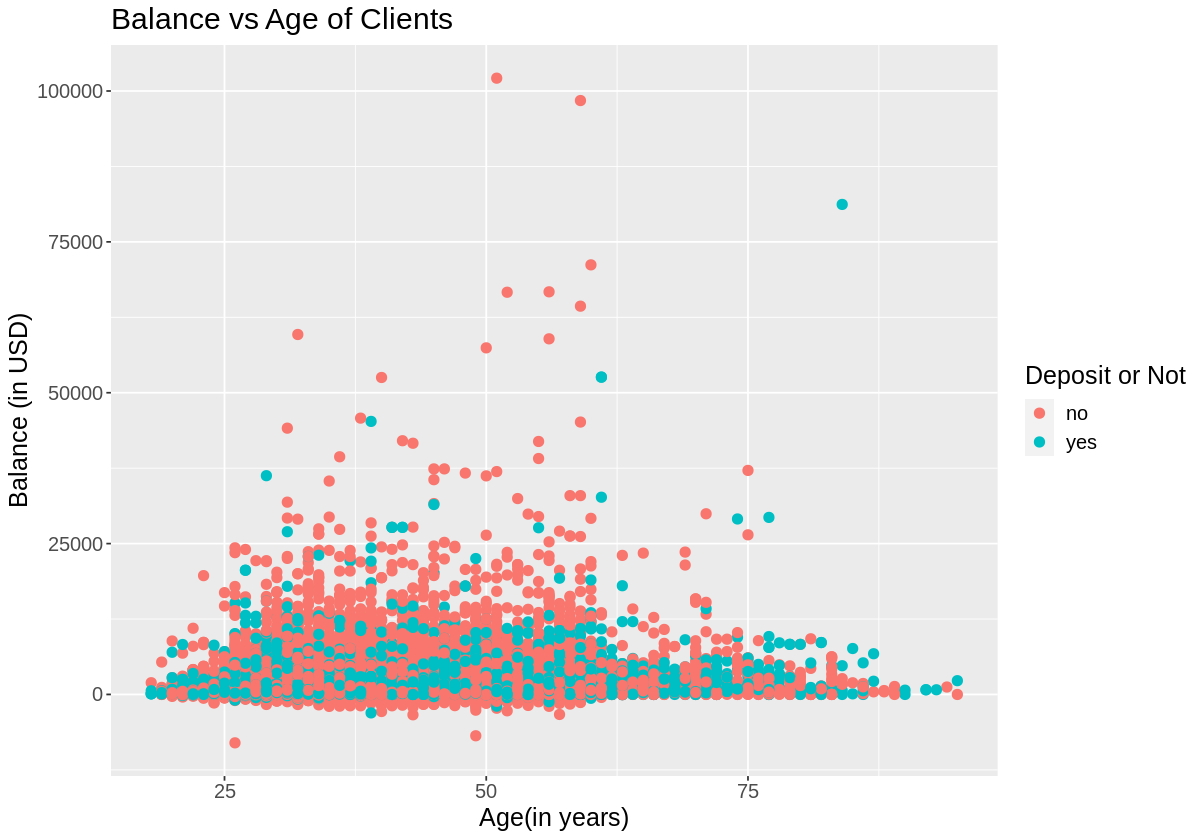

In [5]:
options(repr.plot.width=10, repr.plot.height=7)

bank_train_plot1 <-  bank_train%>%
    ggplot(aes(x= age, 
               y= balance, 
               colour = y)) +
        labs(x = "Age(in years)",
             y = "Balance (in USD)",
            colour = 'Deposit or Not') +
    ggtitle("Balance vs Age of Clients") +
        geom_point(size = 2.5) +
        theme(text = element_text(size = 15))
bank_train_plot1

Plot 1: Scatter plot of Balance Vs Age

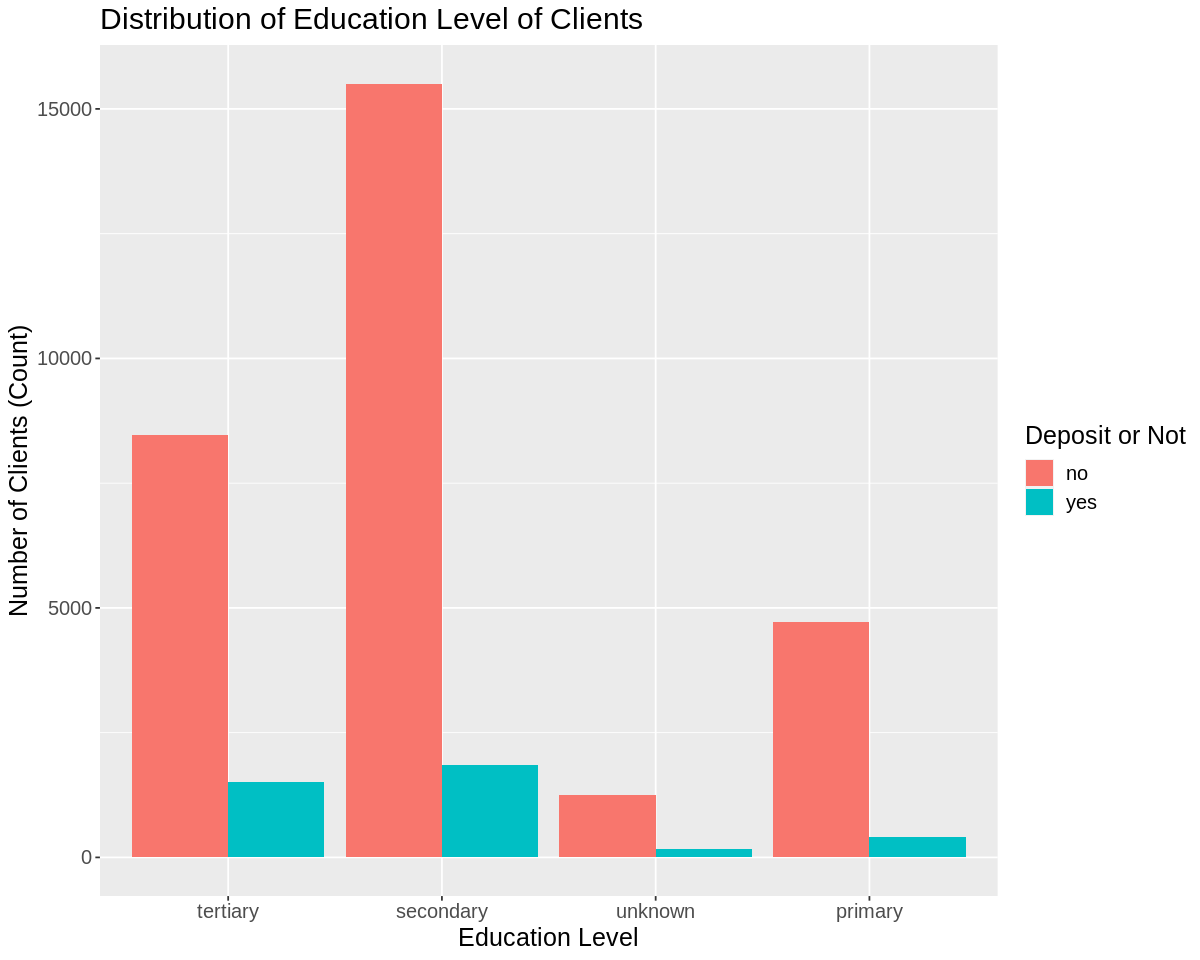

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8) 
bank_train_plot2 <- 
     ggplot(bank_train, aes(x = education)) +
     geom_bar(aes(fill = y), position = "dodge") +
     labs(y = "Number of Clients (Count)", x = "Education Level", fill = "Deposit or Not") +
     ggtitle("Distribution of Education Level of Clients") +
     theme(legend.position = "right", text = element_text(size = 15))

bank_train_plot2

Plot 2: Histogram plot of Distribution of Education Level of Clients

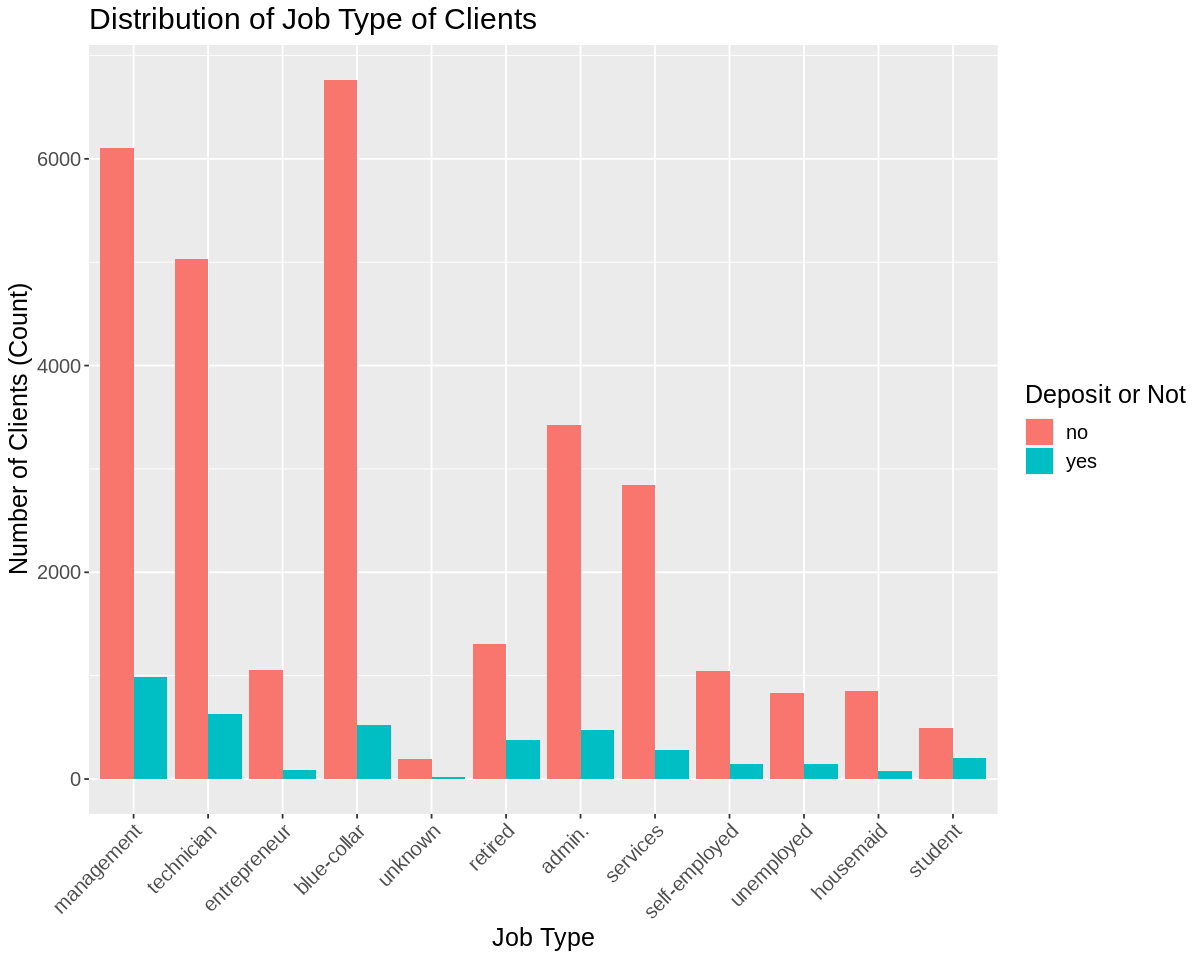

In [7]:
options(repr.plot.width = 10, repr.plot.height = 8) 
bank_train_plot3 <- 
     ggplot(bank_train, aes(x = job)) +
     geom_bar(aes(fill = y), position = "dodge") +
     labs(y = "Number of Clients (Count)", x = "Job Type", fill = "Deposit or Not") +
     ggtitle("Distribution of Job Type of Clients") +
     theme(legend.position = "right", text = element_text(size = 15))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

bank_train_plot3

Plot 3: Histogram plot of Distribution Job Type of Clients

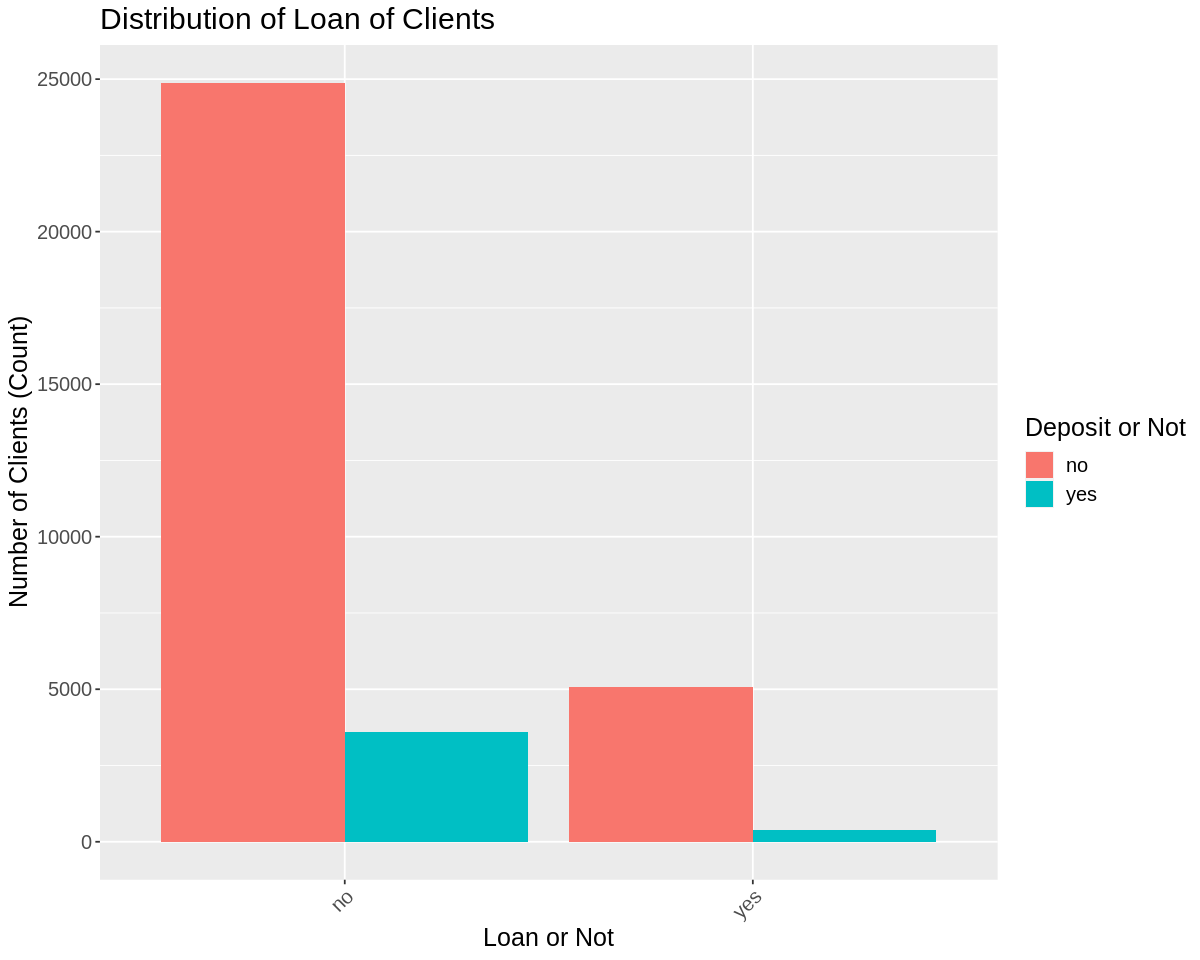

In [8]:
options(repr.plot.width = 10, repr.plot.height = 8) 
bank_train_plot4 <- 
     ggplot(bank_train, aes(x = loan)) +
     geom_bar(aes(fill = y), position = "dodge") +
     labs(y = "Number of Clients (Count)", x = "Loan or Not", fill = "Deposit or Not") +
     ggtitle("Distribution of Loan of Clients") +
     theme(legend.position = "right", text = element_text(size = 15))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

bank_train_plot4

Plot 4: Histogram plot of Distribution Loan of Clients

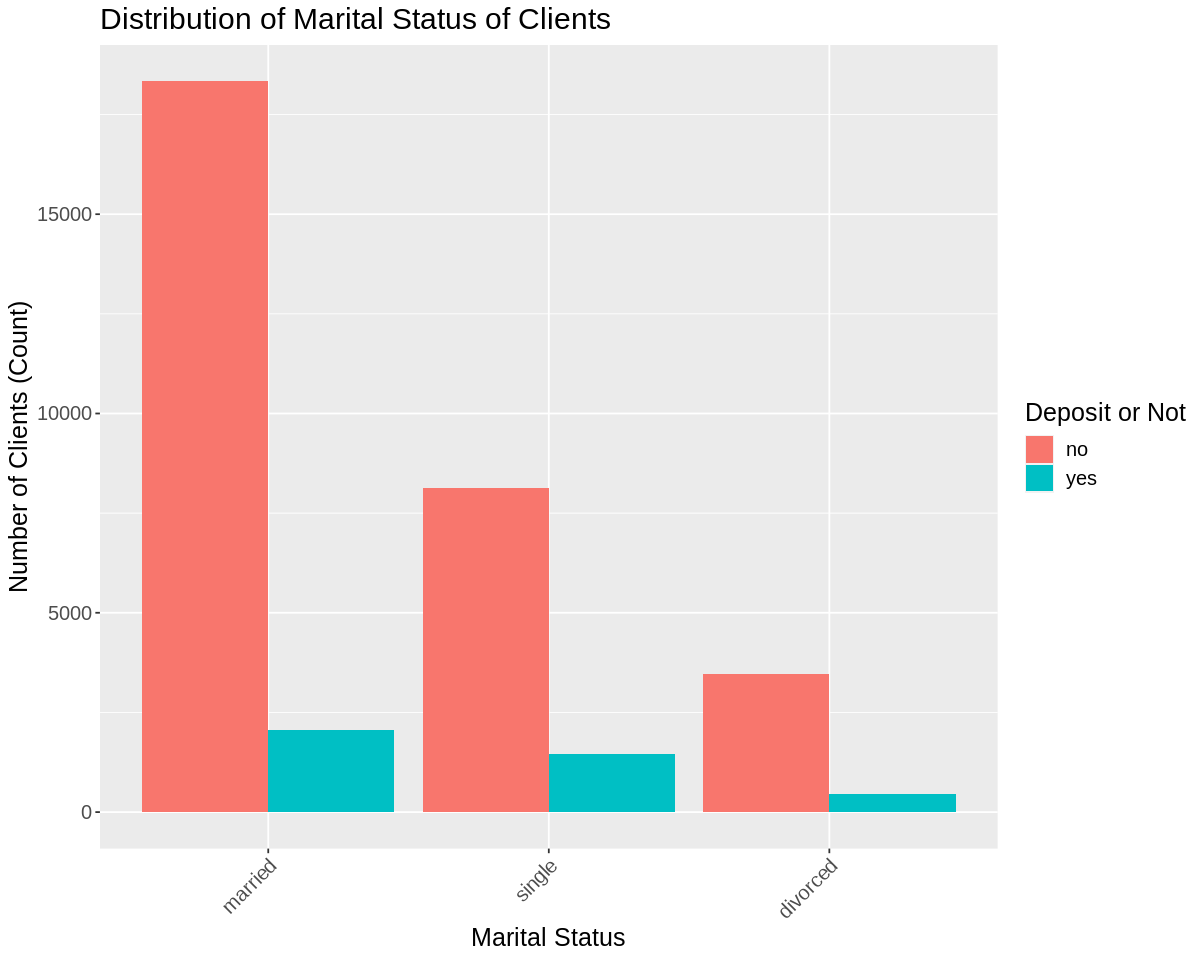

In [9]:
options(repr.plot.width = 10, repr.plot.height = 8) 
bank_train_plot5 <- 
     ggplot(bank_train, aes(x = marital)) +
     geom_bar(aes(fill = y), position = "dodge") +
     labs(y = "Number of Clients (Count)", x = "Marital Status", fill = "Deposit or Not") +
     ggtitle("Distribution of Marital Status of Clients") +
     theme(legend.position = "right", text = element_text(size = 15))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

bank_train_plot5

Plot 5: Histogram plot of Distribution Martial Status of Clients

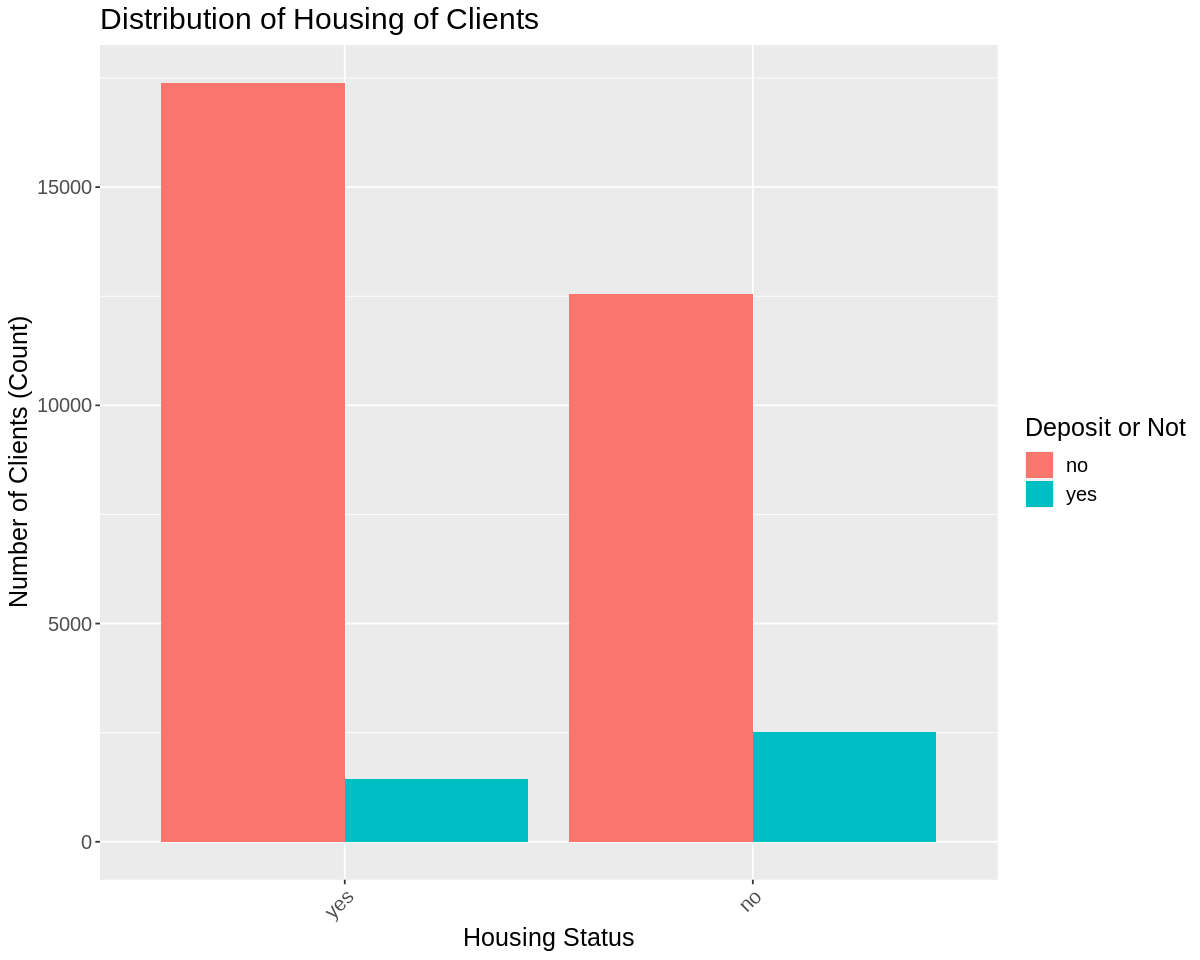

In [10]:
options(repr.plot.width = 10, repr.plot.height = 8) 
bank_train_plot6 <- 
     ggplot(bank_train, aes(x = housing)) +
     geom_bar(aes(fill = y), position = "dodge") +
     labs(y = "Number of Clients (Count)", x = "Housing Status", fill = "Deposit or Not") +
     ggtitle("Distribution of Housing of Clients") +
     theme(legend.position = "right", text = element_text(size = 15))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

bank_train_plot6

Plot 6: Histogram plot of Distribution Housing Status of Clients

In numeric prediction variables, both of variable age and balance make important contribution. <br>
As for categorical prediction variables, the plots describe that job, education and loan might weight more than others. 

#### 3. Data Analysis -- KNN Classification

 3.0 Scale and Center the predictors

In [11]:
knn_recipe <- recipe(y ~ ., data = bank_train) %>%
   step_scale(age, balance) %>%   # we dont need to scale factors
   step_center(age, balance)

3.1 For finding the optimal K value, using training set to train the model

In [12]:
set.seed(2021) #setting seed so that our results does not change
# testing K values from 1 to 25 to obtain a better score
gridvals<- tibble(neighbors = seq(from = 1,to = 25, by = 1))

# Create a model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")

# Performing 5 cross-fold validation 
bank_vfold <- vfold_cv(bank_train, v = 5, strata = y)

# Training Model using workflow
knn_results <- workflow() %>%
      add_recipe(knn_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = bank_vfold, grid = gridvals) %>%
      collect_metrics() 

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8301342,5,0.003253866,Model01
1,roc_auc,binary,0.5974441,5,0.005353686,Model01
2,accuracy,binary,0.8301046,5,0.003070060,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
24,roc_auc,binary,0.6700019,5,0.0039583071,Model24
25,accuracy,binary,0.8821257,5,0.0004271928,Model25
25,roc_auc,binary,0.6699507,5,0.0034762907,Model25


Table 4: Result of Training Accuracy By Using 5 Cross-Fold Validation, K Ranging From 1 to 25

#### 3.2 Visualize the models through "Accuracy vs K' plot

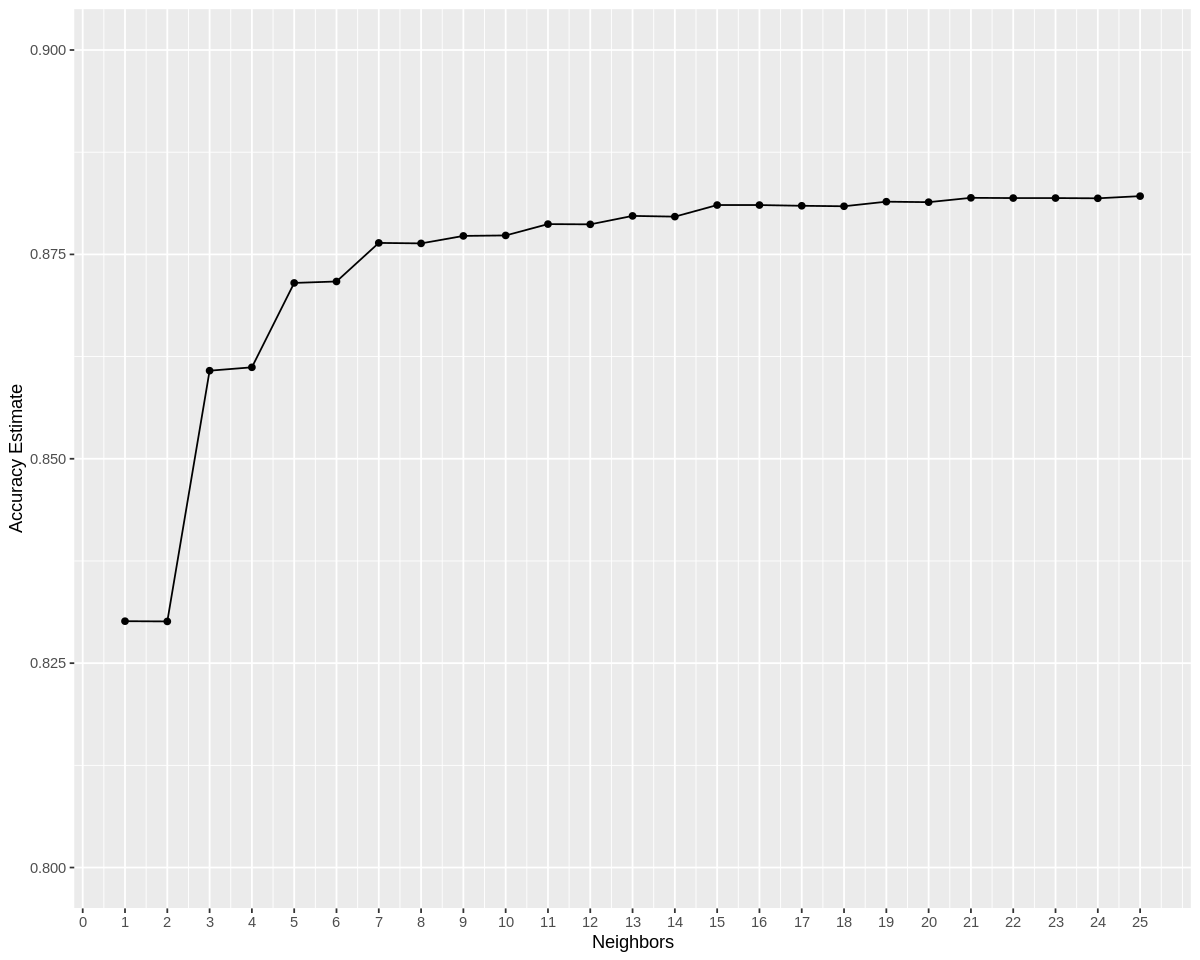

In [13]:
accuracies <- knn_results %>% 
      filter(.metric == "accuracy")
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 25, by = 1)) +  
      scale_y_continuous(limits = c(0.8, 0.9)) 

accuracy_versus_k

Plot 7: Accuracy VS K For Choosing Best K Value

From Plot 4, we can see that at `K = 25` the accuracy reaches its peak, then plateau.
So we choose` K = 25` as the optimal value of K.
In fact, if we go for a higher number of folds(neighbous), we would possibily get a better score. But due to performance issue we are limiting it to 25, otherwise this will take forever to run.
On the other hand, we can see that the accurcy increase was very unsignificant after k=20, so we are safe to use` K = 25` here.

In [20]:
knn_results %>% filter(.metric == "accuracy")%>% 
                arrange(desc(mean)) #here we re-arrange the result metrics to obtain the best K

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
25,accuracy,binary,0.8821257,5,0.0004271928,Model25
21,accuracy,binary,0.8819194,5,0.0006084605,Model21
22,accuracy,binary,0.8818899,5,0.0006106337,Model22
⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,accuracy,binary,0.8607746,5,0.001739140,Model03
1,accuracy,binary,0.8301342,5,0.003253866,Model01
2,accuracy,binary,0.8301046,5,0.003070060,Model02


Table 5: Training Accuracy with K = 15

#### 3.3 Applying the Model to Test Set With K = 15

In [17]:
set.seed(2021) #setting seed so that our results does not change
# K = 25
best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) %>% #setting neighbors to the K we found
      set_engine("kknn") %>%
      set_mode("classification")

# training model 
best_fit <- workflow() %>%
      add_recipe(knn_recipe) %>%
      add_model(best_spec) %>%
      fit(data = bank_train)

# fit model to test set
bank_predictions <- predict(best_fit , bank_test) %>%
      bind_cols(bank_test)

In [18]:
bank_predictions<-bank_predictions%>% mutate(y = as_factor(y))
bank_predictions

.pred_class,y,age,balance,job,loan,marital,education,housing
<fct>,<fct>,<int>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>
no,no,28,447,management,yes,single,tertiary,yes
no,no,53,6,technician,no,married,secondary,yes
no,no,33,0,services,no,married,secondary,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
yes,yes,71,1729,retired,no,divorced,primary,no
no,no,57,668,blue-collar,no,married,secondary,no
no,no,37,2971,entrepreneur,no,married,secondary,no


In [21]:
pred_metrics <- bank_predictions %>%
        metrics(truth = y, estimate = .pred_class)%>%
        filter(.metric == "accuracy")
        

 pred_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8811715


Table 6: Testing Accuracy with K = 25

From Table 5 & 6, the results of training accuracy and testing accuracy are nearly the same(88.1% & 88.0%). We can infer that the model we trained is robust and trustworthy. 

#### 3.4 Analysis Visuliaztion
We decide to use a heatmap to represent an immediate visual summary of the 

In [22]:
options(repr.plot.width=10, repr.plot.height=10)

bank_conf_mat <- bank_predictions %>% 
       conf_mat(truth = y, estimate = .pred_class)

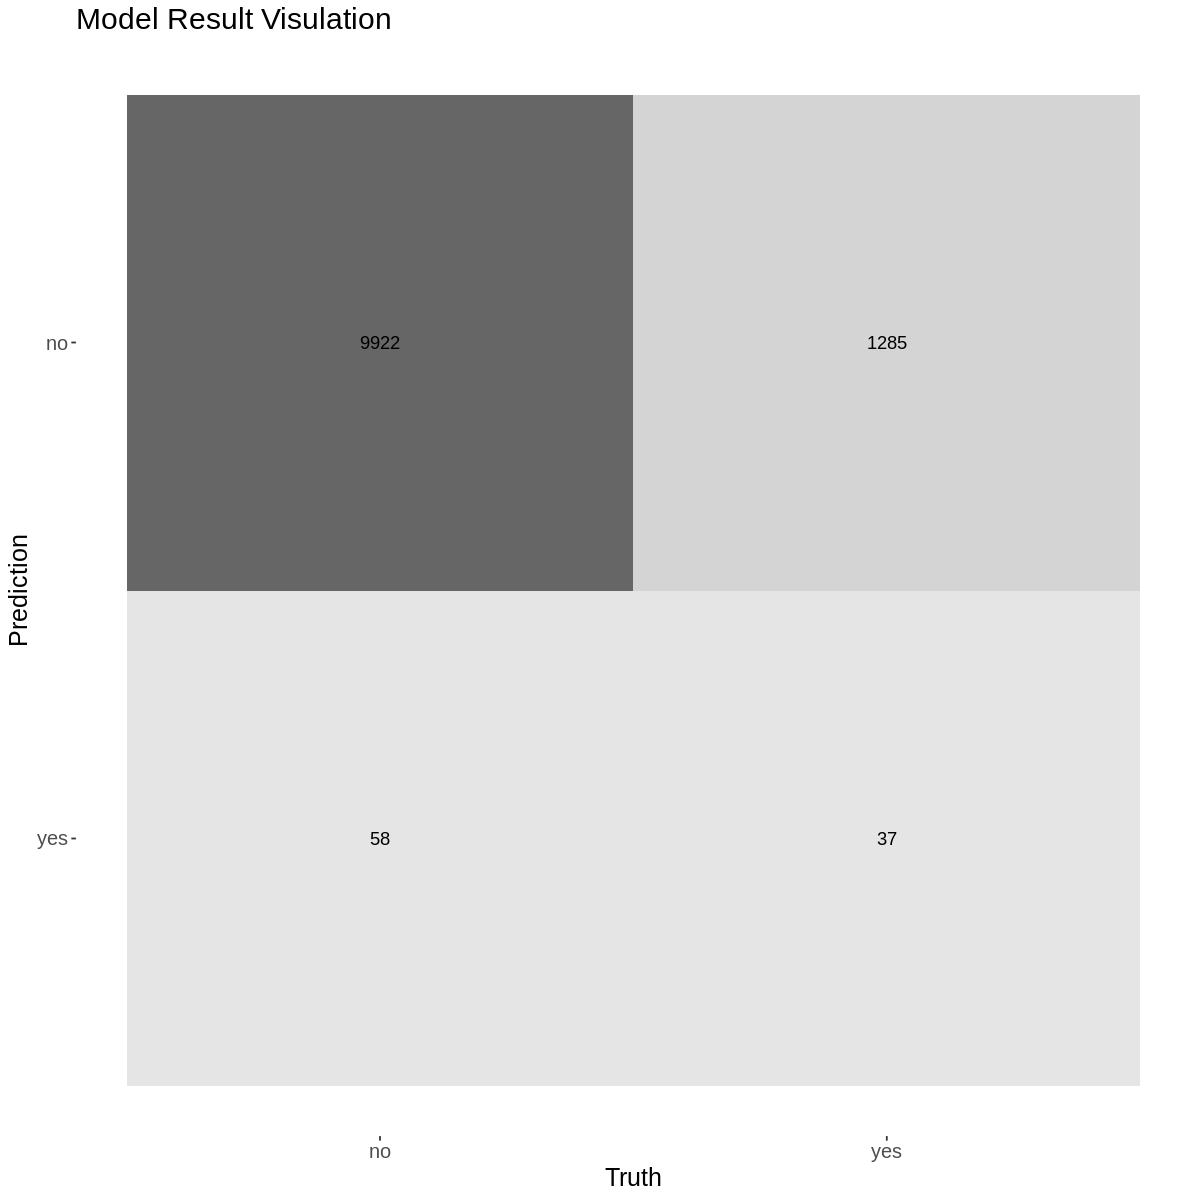

In [23]:
result_plot <- bank_conf_mat%>% autoplot(
         type = "heatmap")+
         theme(text = element_text(size=15)) +
         ggtitle("Model Result Visulation")
result_plot

Plot 8: Analysis Visulation of K = 25<br>
The predicting of No is much denser than Yes in the plot, which reflicts the summary in Section 2.3, prop of deposit is around 11.7%. 

### 4. Discussion

#### 4.1 Summarize what we found
Results show that older clients who have a lower education background were less interested in term deposits. Results show that older clients who have a lower education background were less interested in term deposits. In this analysis, we used the KNN algorithm to classify whether a client would deposit or not. We then measured the algorithm's accuracy for various values of K. We found that it was highest at k = 15, with a classification accuracy of 88%. This means that if we gave the model 100 clients, our model would accurately classify 88 of them. 
In addition, the run time is fairly long during the training model tuning phase. We believe this is one of the drawbacks about KNN, which is the slow prediction stage (O_ndk) and thus high time cost.  
n: number of data points
d: dimensions
k: optimal K value 

#### 4.2 Discuss whether this is what we expected to find?
Yes, the results matched our expectations as the training model achieved 88.1 accurcy on the test set. 


#### 4.3  Discuss what impact could such findings have?
This model shows that for every 100 clients, 12 will subscribe to a term deposit. Therefore, the bank can use this model to their advantage and accurately filter the 10 clients who will most likely subscribe to term deposits and direct their marketing towards those people, rather than randomly choosing 10 clients. This would allow the bank to better budget how much they can further lend out to other customers and businesses, positively impacting the company’s overall operation.  


#### 4.4 Discuss what future questions could this lead to?
From this analysis, we know that demographics play a role in whether an individual will subscribe to a term deposit. Therefore, in the future, banks can use this model as a reference to select clients who have a higher tendency to subscribe to term deposits and direct their marketing campaigns towards these people. 

Coming from a bank’s perspective, they always want to increase the number of clients who buy into these various investment products offered by the banks. Therefore, in the future, we can create a model to separate individuals into various clusters and figure out what type of investment products these clusters are more receptive to. An example would be the cluster of individuals who are younger and have a steady income. This cluster might have a greater risk appetite and be more interested in riskier investment options and products. In comparison, an older-age cluster might lean towards investment options that are lower in risk. 

This dataset is also related to a specific Portuguese banking institution. Therefore, in the future, we could obtain other similar datasets that focus on other countries, such as the US and China and see if there is a common trend in all the various locations.  


### References

Chen, J. (2021, April 29). Term Deposit. Retrieved August 12, 2021, from https://www.investopedia.com/terms/t/termdeposit.asp

Westpac. (n.d.). What's the difference between a term deposit and a savings account? Retrieved from https://www.westpac.com.au/personal-banking/bank-accounts/term-deposit/savings-vs-term-deposit/